In [1]:
import sklearn

In [74]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import random
from tqdm import tqdm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [75]:
x,y = make_classification(n_samples=10000,n_features=2,random_state=60,n_clusters_per_class=1,n_informative=2,n_redundant=0)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,stratify=y,random_state=42)

In [76]:
Xtrain.shape

(7500, 2)

In [77]:
Ytrain.shape

(7500,)

In [78]:
Xtest.shape

(2500, 2)

In [79]:
Ytest.shape

(2500,)

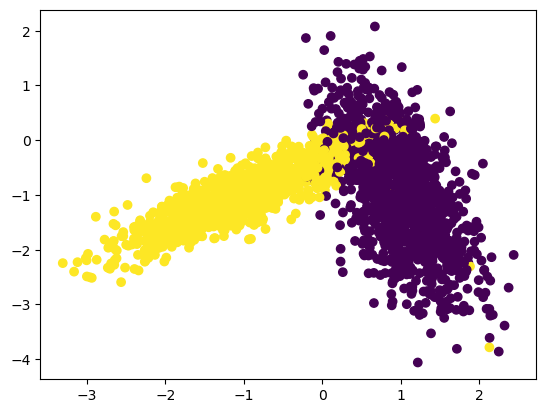

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(Xtest[:,0], Xtest[:,1],c = Ytest)
plt.show()

In [81]:
def randomly_select_60_percent_indices_in_range_from_1_to_len(Xtrain):
    return random.sample(range(0, len(Xtrain)), int(0.6*len(Xtrain)))

In [61]:
def GridSearchCV(Xtrain,Ytrain, classifier, params, folds):
    trainscores = []
    testscores = []
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0,folds):
            train_indices = randomly_select_60_percent_indices_in_range_from_1_to_len(Xtrain)
            test_indices = list(set(list(range(1,len(Xtrain)))) - set(train_indices))
            
            X_train = Xtrain[train_indices]
            Y_train = Ytrain[train_indices]
            X_cv  = Xtrain[test_indices]
            Y_cv  = Ytrain[test_indices]
            
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            
            Y_predicted = classifier.predict(X_cv)
            testscores_folds.append(accuracy_score(Y_cv, Y_predicted))
            
            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train,Y_predicted))
        
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    
    return trainscores,testscores       

In [87]:
def RandomSearchCV(Xtrain, Ytrain, k_range, start, stop, folds, classifier):
    params = set()
    trainscores = []
    testscores = []
    while (len(params) < k_range):
        val = random.sample(range(start,stop),1)
        if (val[0] % 2) != 0:
                params.add(val[0])
        else:
            continue
    
    params = sorted(list(params))
    print("k values are: \n", params)
    
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds  = []
        for j in range(0,folds):
            train_indices = randomly_select_60_percent_indices_in_range_from_1_to_len(Xtrain)
            test_indices = list(set(list(range(1,len(Xtrain)))) - set(train_indices))
            
            X_train = Xtrain[train_indices]
            Y_train = Ytrain[train_indices]
            X_cv  = Xtrain[test_indices]
            Y_cv  = Ytrain[test_indices]
            
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            
            Y_predicted = classifier.predict(X_cv)
            testscores_folds.append(accuracy_score(Y_cv, Y_predicted))
            
            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train,Y_predicted))
        
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    
    return trainscores,testscores,params

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:07<00:00,  1.39it/s]


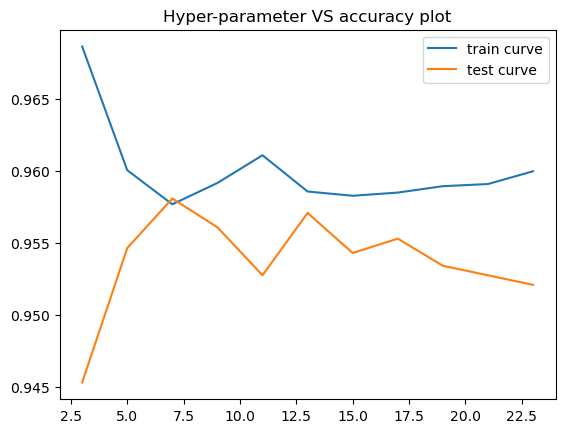

In [66]:
import warnings
warnings.filterwarnings("ignore")
neigh = KNeighborsClassifier()

params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}
folds = 3

trainscores,testscores = GridSearchCV(Xtrain, Ytrain, neigh, params, folds)
 

plt.plot(params['n_neighbors'],trainscores, label='train curve')
plt.plot(params['n_neighbors'],testscores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [67]:
classifier_final = KNeighborsClassifier(n_neighbors=17)
classifier_final.fit(Xtrain,Ytrain)
Y_pred = classifier_final.predict(Xtest)
acc = accuracy_score(Ytest,Y_pred)
print(acc)

0.9684


Enter the start value for generating k randomly:
1
Enter the end value for the range for generating k:
50
Enter the number of values of k to be generated:
10
Enter the number of k folds:
3
k values are: 
 [1, 3, 7, 15, 17, 19, 37, 39, 43, 49]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.42it/s]


[1.0, 0.9673333333333334, 0.9602962962962963, 0.9567407407407407, 0.957925925925926, 0.9594814814814816, 0.9575555555555555, 0.9581481481481481, 0.9574814814814815, 0.9586666666666667]
[1, 3, 7, 15, 17, 19, 37, 39, 43, 49]


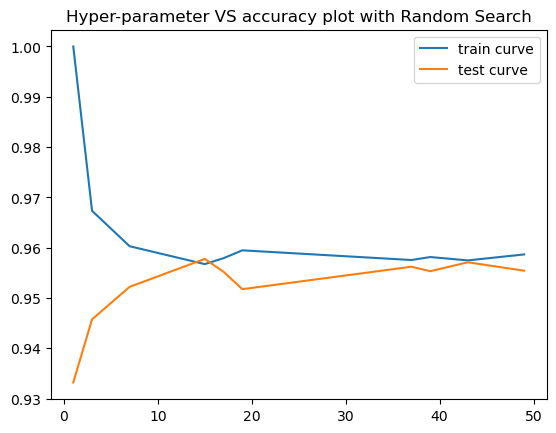

In [88]:
#Using Random Search

start_val = int(input("Enter the start value for generating k randomly:\n"))
end_val = int(input("Enter the end value for the range for generating k:\n"))
k_range = int(input("Enter the number of values of k to be generated:\n"))
folds = int(input("Enter the number of k folds:\n"))
neigh = KNeighborsClassifier()
trainscores,testscores, params = RandomSearchCV(Xtrain, Ytrain, k_range, start_val, end_val, folds, neigh)


plt.plot(params,trainscores, label='train curve')
plt.plot(params,testscores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot with Random Search')
plt.legend()
plt.show()

In [89]:
classifier_finalR = KNeighborsClassifier(n_neighbors=15)
classifier_finalR.fit(Xtrain,Ytrain)
Y_pred = classifier_finalR.predict(Xtest)
acc = accuracy_score(Ytest,Y_pred)
print(acc)

0.9688
